In [41]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from infomap import Infomap
from operator import itemgetter

Creating the graph.

In [7]:
G = nx.read_edgelist('connections.txt', create_using=nx.DiGraph(), nodetype=int)

Finding bridges.

In [8]:
betweenness_dict = nx.betweenness_centrality(G)
max_betweenness = max(betweenness_dict.values())
bridge_nodes = [k for k,v in betweenness_dict.items() if v == max_betweenness]

In [9]:
bridge_nodes

[1684]

Thus the only bridge node is 1684.

Estimating the density of graph.

In [10]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f'The number of nodes: {num_nodes}')
print(f'The number of nodes: {num_edges}')

The number of nodes: 4039
The number of nodes: 88234


The maximum amount of edges a directed graph on n nodes can have is n*(n-1), (Take into account that between each pair of nodes here the maximum number of edges is 2). Thus we will proceed by estimating what proportion of all possible edges is present in our graph (we'll call it a density metric).

In [11]:
print(f'The density metric of our graph is: {num_edges/(num_nodes*(num_nodes-1))}')

The density metric of our graph is: 0.0054099817517196435


Very small proportion of all possible edges is present, thus we have quite sparse graph.

Now let's see the nodes having maximum degrees, out-degrees and in-degrees respectively.

In [12]:
degree_dict = dict(G.degree())
max_degree = max(degree_dict.values())
max_deg_nodes = [k for k,v in degree_dict.items() if v == max_degree]
print(f'The list of nodes having maximum degree: {max_deg_nodes}')

The list of nodes having maximum degree: [107]


In [13]:
outdegree_dict = dict(G.out_degree())
max_outdegree = max(outdegree_dict.values())
max_outdeg_nodes = [k for k,v in outdegree_dict.items() if v == max_outdegree]
print(f'The list of nodes having maximum outdegree: {max_outdeg_nodes}')

The list of nodes having maximum outdegree: [107]


In [14]:
indegree_dict = dict(G.in_degree())
max_indegree = max(indegree_dict.values())
max_indeg_nodes = [k for k,v in indegree_dict.items() if v == max_indegree]
print(f'The list of nodes having maximum indegree: {max_indeg_nodes}')

The list of nodes having maximum indegree: [1888]


We see that the node that has the highest degree is 107 and also it is the one that has the highest out-degree. It means that 107 is some kind of influencer.

Let's calculate centralities.

In [15]:
closeness_centrality_dict = nx.closeness_centrality(G)
max_closeness_centrality = max(closeness_centrality_dict.values())
max_closeness_nodes = [k for k,v in closeness_centrality_dict.items() if v == max_closeness_centrality]
print(f'The list of nodes having maximum closeness centrality: {max_closeness_nodes}')

The list of nodes having maximum closeness centrality: [2642]


In [16]:
betweenness_centrality_dict = nx.betweenness_centrality(G)
max_betweenness_centrality = max(betweenness_centrality_dict.values())
max_betweenness_nodes = [k for k,v in betweenness_centrality_dict.items() if v == max_betweenness_centrality]
print(f'The list of nodes having maximum betweenness centrality: {max_betweenness_nodes}')

The list of nodes having maximum betweenness centrality: [1684]


In [17]:
eigenvector_centrality_dict = nx.eigenvector_centrality(G, max_iter=1000)
max_eigenvector_centrality = max(eigenvector_centrality_dict.values())
max_eigenvector_nodes = [k for k,v in eigenvector_centrality_dict.items() if v == max_eigenvector_centrality]
print(f'The list of nodes having maximum eigenvector centrality: {max_eigenvector_nodes}')

The list of nodes having maximum eigenvector centrality: [2655]


Thus we see that node 2642 generally has the shortest paths to all other nodes.
The node 1684 is the bridge node that we saw in the beggining, the largest amount of shortest paths between all pairs of nodes pass through that node.
And the eigenvector centrality shows that node 2655 is of the highest importance in the graph.

Let's implement the algorithm for finding communities.

In [20]:
def findCommunities(G):
    im = Infomap("--two-level --directed")
    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges():
        im.addLink(*e)
    print("Find communities with Infomap...")
    im.run()
    print("Found {0} communities with codelength: {1}".format(im.num_top_modules,im.codelength))
    communities = {}
    for node in im.tree:
        communities[node.node_id] = node.module_id
    nx.set_node_attributes(G, communities,'community')
    return im

In [24]:
imap = findCommunities(G)
print(imap)

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
  Infomap v2.7.1 starts at Found 93 communities with codelength: 6.597421991082099
<infomap.Infomap; proxy of <Swig Object of type 'infomap::InfomapWrapper *' at 0x7fcb3ff42af0> >
2023-05-18 21:49:44
  -> Input network: 
  -> No file output!
  -> Configuration: two-level
                    directed
  OpenMP 201511 detected with 8 threads...
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'directed'... 
  -> Using unrecorded teleportation to links. 
  -> PageRank calculation done in 84 iterations.

  => Sum node flow: 1, sum link flow: 1
Build internal network with 4039 nodes and 88234 links...
  -> One-level codelength: 9.86597315

Trial 1/1 starting at 2023-05-18 21:49:44
Two-level compression: 32% 1.1% 0.0638488168% 0.00543611877% 
Partitioned to codelength 0.404630228 + 6.19279176 = 6.597421991 in 93 (92 non-trivial) m

We see that 93 communities are formed using InfoMap algorithm.

Now we select the largest and the smallest communities.

In [30]:
community_counts = {i:0 for i in range(1,94)}
for v, c in G.nodes.items():
    community_counts[c['community']] += 1

In [31]:
community_counts

{1: 237,
 2: 334,
 3: 20,
 4: 470,
 5: 226,
 6: 27,
 7: 168,
 8: 238,
 9: 231,
 10: 108,
 11: 164,
 12: 73,
 13: 199,
 14: 141,
 15: 149,
 16: 12,
 17: 137,
 18: 111,
 19: 38,
 20: 54,
 21: 14,
 22: 49,
 23: 54,
 24: 25,
 25: 4,
 26: 58,
 27: 21,
 28: 19,
 29: 21,
 30: 30,
 31: 36,
 32: 57,
 33: 32,
 34: 19,
 35: 19,
 36: 22,
 37: 19,
 38: 29,
 39: 19,
 40: 14,
 41: 13,
 42: 7,
 43: 16,
 44: 15,
 45: 9,
 46: 15,
 47: 5,
 48: 10,
 49: 10,
 50: 4,
 51: 7,
 52: 12,
 53: 14,
 54: 8,
 55: 10,
 56: 9,
 57: 9,
 58: 8,
 59: 1,
 60: 6,
 61: 8,
 62: 11,
 63: 12,
 64: 22,
 65: 6,
 66: 3,
 67: 7,
 68: 2,
 69: 6,
 70: 4,
 71: 5,
 72: 6,
 73: 3,
 74: 6,
 75: 6,
 76: 4,
 77: 3,
 78: 3,
 79: 3,
 80: 3,
 81: 2,
 82: 2,
 83: 2,
 84: 3,
 85: 2,
 86: 3,
 87: 3,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 93: 3}

In [32]:
sorted_communities = {k: v for k,v in sorted(community_counts.items(), key=lambda item: item[1])}

In [33]:
sorted_communities

{59: 1,
 68: 2,
 81: 2,
 82: 2,
 83: 2,
 85: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 66: 3,
 73: 3,
 77: 3,
 78: 3,
 79: 3,
 80: 3,
 84: 3,
 86: 3,
 87: 3,
 93: 3,
 25: 4,
 50: 4,
 70: 4,
 76: 4,
 47: 5,
 71: 5,
 60: 6,
 65: 6,
 69: 6,
 72: 6,
 74: 6,
 75: 6,
 42: 7,
 51: 7,
 67: 7,
 54: 8,
 58: 8,
 61: 8,
 45: 9,
 56: 9,
 57: 9,
 48: 10,
 49: 10,
 55: 10,
 62: 11,
 16: 12,
 52: 12,
 63: 12,
 41: 13,
 21: 14,
 40: 14,
 53: 14,
 44: 15,
 46: 15,
 43: 16,
 28: 19,
 34: 19,
 35: 19,
 37: 19,
 39: 19,
 3: 20,
 27: 21,
 29: 21,
 36: 22,
 64: 22,
 24: 25,
 6: 27,
 38: 29,
 30: 30,
 33: 32,
 31: 36,
 19: 38,
 22: 49,
 20: 54,
 23: 54,
 32: 57,
 26: 58,
 12: 73,
 10: 108,
 18: 111,
 17: 137,
 14: 141,
 15: 149,
 11: 164,
 7: 168,
 13: 199,
 5: 226,
 9: 231,
 1: 237,
 8: 238,
 2: 334,
 4: 470}

We see that the largest community is 4-th community and the smallest community is the 59-th community. As we see the size of clusters varies quite a lot. Thus we may want to center our attention to targeting cluster 4 and also 2, 8, 1.

Let's plot the induced subgraphs of the largest communities.

In [34]:
comm_4 = selected_data = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 4)
comm_2 = selected_data = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 2)
comm_8 = selected_data = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 8)

In [36]:
sg_4 = G.subgraph(list(comm_4.keys()))
sg_2 = G.subgraph(list(comm_2.keys()))
sg_8 = G.subgraph(list(comm_8.keys()))

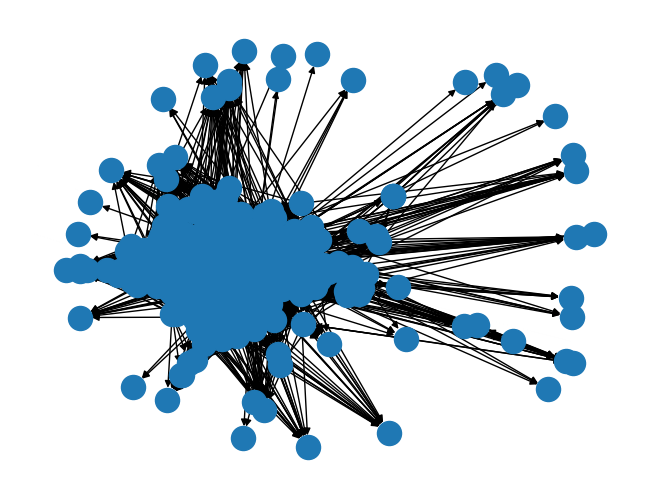

In [37]:
nx.draw(sg_4, pos=nx.spring_layout(sg_4, seed=374099))

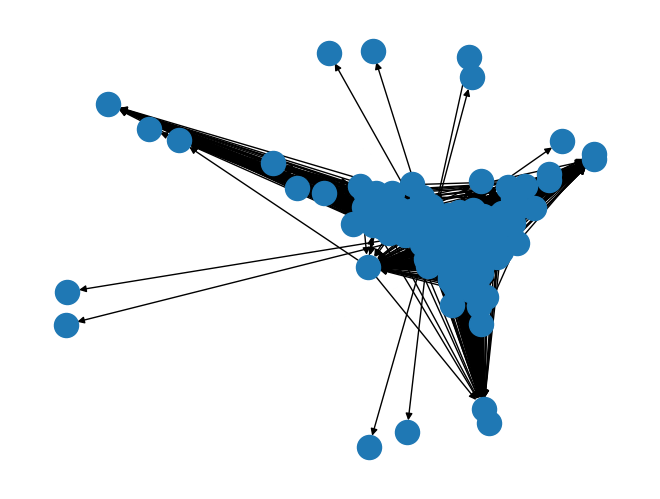

In [39]:
nx.draw(sg_2, pos=nx.spring_layout(sg_2, seed=374099))

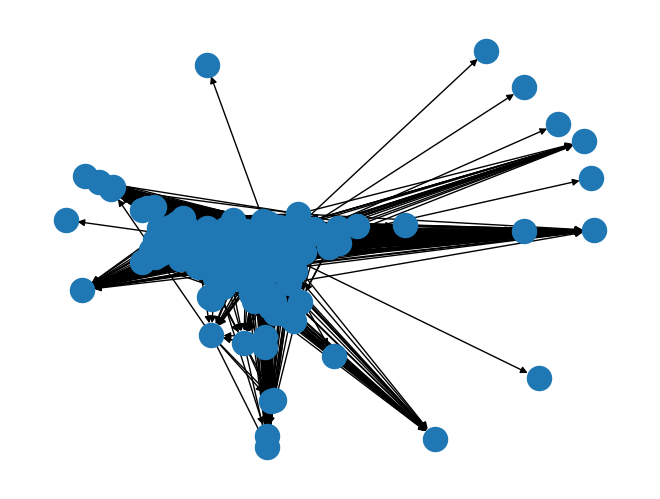

In [40]:
nx.draw(sg_8, pos=nx.spring_layout(sg_8, seed=374099))

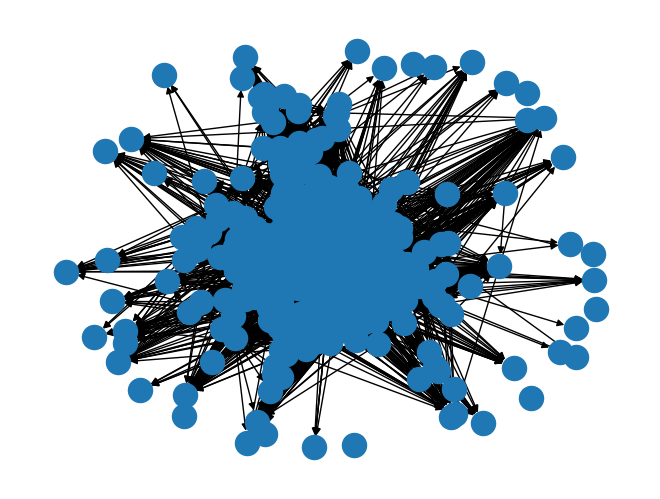

In [59]:
betweenness_dict = nx.betweenness_centrality(sg_4)
nx.set_node_attributes(sg_4, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
top3b=[tup[0] for tup in sorted_betweenness][:3]

closeness_dict = nx.closeness_centrality(sg_4)
nx.set_node_attributes(sg_4, closeness_dict, 'closeness')
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1),reverse=True)
top3c=[tup[0] for tup in sorted_closeness][:3]

eigen_dict = nx.eigenvector_centrality(sg_4, max_iter=1000)
nx.set_node_attributes(sg_4, eigen_dict, 'eigen')
sorted_eigen = sorted(eigen_dict.items(), key=itemgetter(1),reverse=True)
top3e=[tup[0] for tup in sorted_eigen][:3]
top3b.extend(top3c)
top3b.extend(top3e)
nodes_to_exclude = set(top3b)

list_4_exc = [i for i in comm_4.keys() if i not in nodes_to_exclude]

sg_4_inf_removed = G.subgraph(list_4_exc)
nx.draw(sg_4_inf_removed, pos=nx.spring_layout(sg_4_inf_removed, seed=374099))

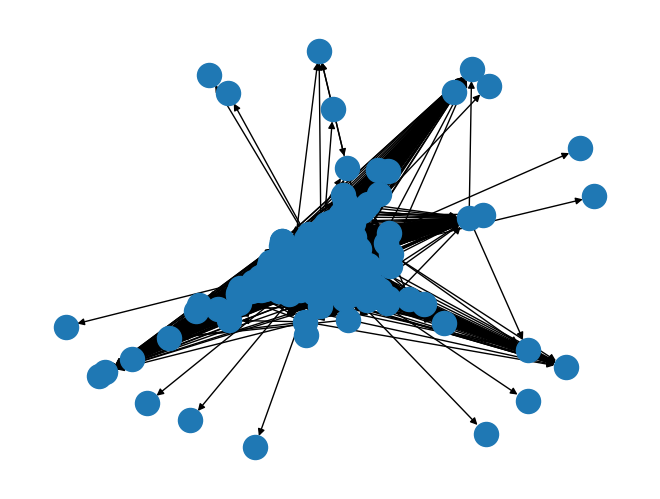

In [60]:
betweenness_dict = nx.betweenness_centrality(sg_2)
nx.set_node_attributes(sg_2, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
top3b=[tup[0] for tup in sorted_betweenness][:3]

closeness_dict = nx.closeness_centrality(sg_2)
nx.set_node_attributes(sg_2, closeness_dict, 'closeness')
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1),reverse=True)
top3c=[tup[0] for tup in sorted_closeness][:3]

eigen_dict = nx.eigenvector_centrality(sg_2, max_iter=1000)
nx.set_node_attributes(sg_2, eigen_dict, 'eigen')
sorted_eigen = sorted(eigen_dict.items(), key=itemgetter(1),reverse=True)
top3e=[tup[0] for tup in sorted_eigen][:3]
top3b.extend(top3c)
top3b.extend(top3e)
nodes_to_exclude = set(top3b)

list_2_exc = [i for i in comm_2.keys() if i not in nodes_to_exclude]

sg_2_inf_removed = G.subgraph(list_2_exc)
nx.draw(sg_2_inf_removed, pos=nx.spring_layout(sg_2_inf_removed, seed=374099))

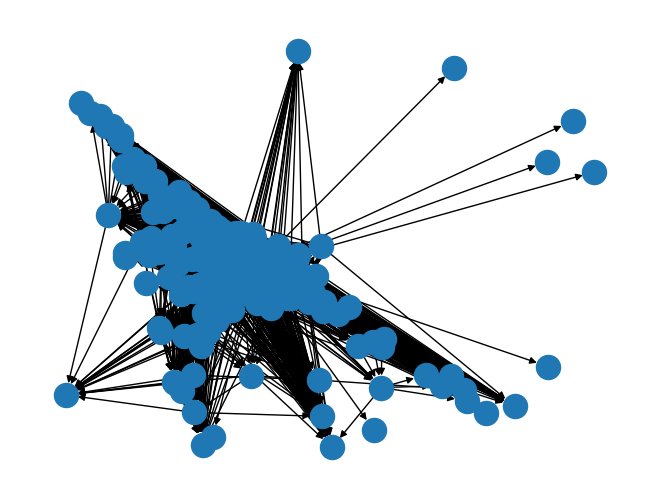

In [61]:
betweenness_dict = nx.betweenness_centrality(sg_8)
nx.set_node_attributes(sg_8, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
top3b=[tup[0] for tup in sorted_betweenness][:3]

closeness_dict = nx.closeness_centrality(sg_8)
nx.set_node_attributes(sg_8, closeness_dict, 'closeness')
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1),reverse=True)
top3c=[tup[0] for tup in sorted_closeness][:3]

eigen_dict = nx.eigenvector_centrality(sg_8, max_iter=1000)
nx.set_node_attributes(sg_8, eigen_dict, 'eigen')
sorted_eigen = sorted(eigen_dict.items(), key=itemgetter(1),reverse=True)
top3e=[tup[0] for tup in sorted_eigen][:3]
top3b.extend(top3c)
top3b.extend(top3e)
nodes_to_exclude = set(top3b)

list_8_exc = [i for i in comm_8.keys() if i not in nodes_to_exclude]

sg_8_inf_removed = G.subgraph(list_8_exc)
nx.draw(sg_8_inf_removed, pos=nx.spring_layout(sg_8_inf_removed, seed=374099))

The plots were not very informative as there are too many nodes and edges.

Let's draw the top 3 influencers now. I will consider influencers as the ones having the highest eigenvector centrality.

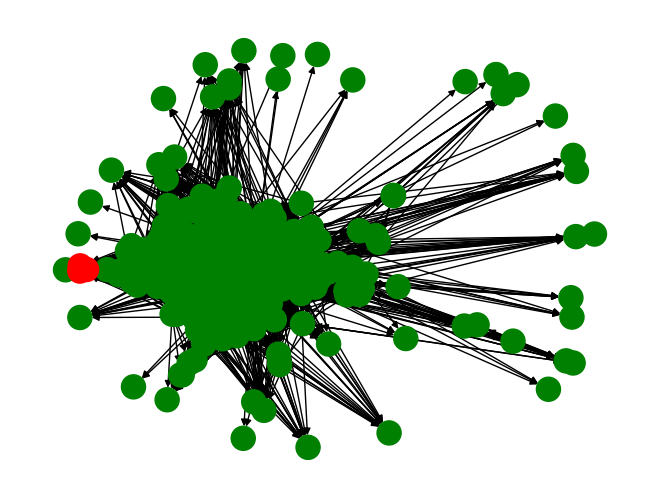

In [63]:
eigen_dict = nx.eigenvector_centrality(sg_4, max_iter=1000)
nx.set_node_attributes(sg_4, eigen_dict, 'eigen')
sorted_eigen = sorted(eigen_dict.items(), key=itemgetter(1),reverse=True)
top3=[tup[0] for tup in sorted_eigen][:3]
color_map= ['red' if node in top3 else 'green' for node in sg_4]

nx.draw(sg_4, pos=nx.spring_layout(sg_4, seed=374099), node_color=color_map, with_labels=False)

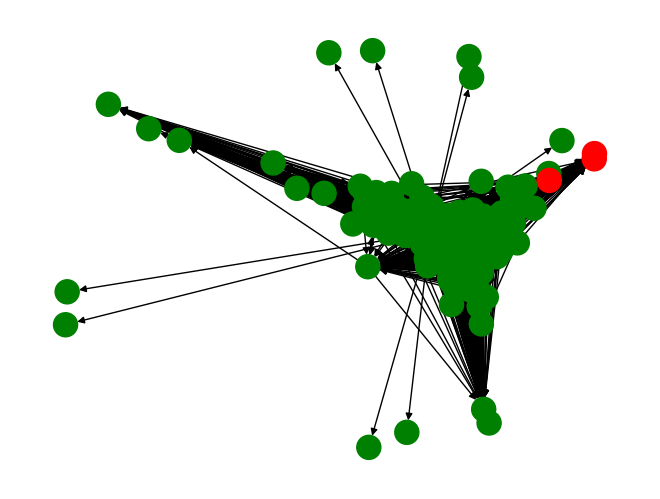

In [64]:
eigen_dict = nx.eigenvector_centrality(sg_2, max_iter=1000)
nx.set_node_attributes(sg_2, eigen_dict, 'eigen')
sorted_eigen = sorted(eigen_dict.items(), key=itemgetter(1),reverse=True)
top3=[tup[0] for tup in sorted_eigen][:3]
color_map= ['red' if node in top3 else 'green' for node in sg_2]

nx.draw(sg_2, pos=nx.spring_layout(sg_2, seed=374099), node_color=color_map, with_labels=False)

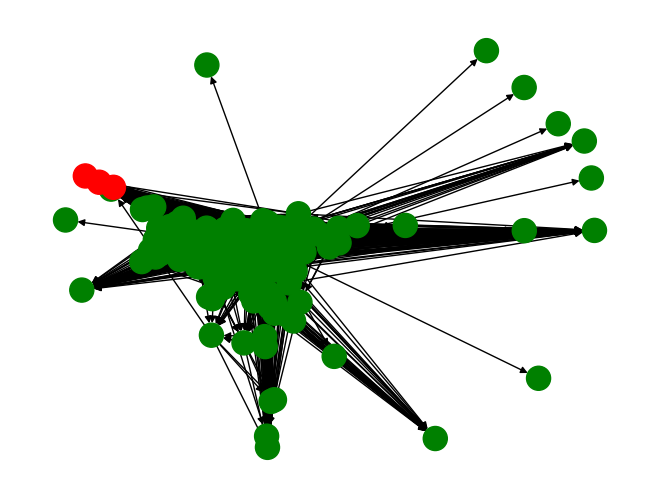

In [65]:
eigen_dict = nx.eigenvector_centrality(sg_8, max_iter=1000)
nx.set_node_attributes(sg_8, eigen_dict, 'eigen')
sorted_eigen = sorted(eigen_dict.items(), key=itemgetter(1),reverse=True)
top3=[tup[0] for tup in sorted_eigen][:3]
color_map= ['red' if node in top3 else 'green' for node in sg_8]

nx.draw(sg_8, pos=nx.spring_layout(sg_8, seed=374099), node_color=color_map, with_labels=False)

The plots weren't very informative, nevertheless we can proceed to designing the action plan.

Let's take a telecom business. What we want to do is to first of all detect the largest communities, because if we attract large community they will bring us more money. After identifying the large communities, we figure out who the influencers of that community are. We contact each of the influencers of those communities and negotiate a price. We understand that most likely it is not a cheap pleasure to order advertisments from them, that is why first we negotiated prices with many influencers, and after having the list of prices, we can make decisions based on our budget in order to maximize the outcome for our business. Thus, to be short, we should target the large communities through their influencers.

# Finally, this was our last activity for this course, so thank you for teaching us!!!